This is a example Convolutional Neural Network using TensorFlow

In [ ]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Reshape data to fit the model (28x28 images with a single color channel)
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32') / 255
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32') / 255

# One-hot encode target labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Build the CNN model
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')  # 10 classes for digits 0-9
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print the model summary
model.summary()

# Train the model
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, batch_size=128)

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.2f}")

# Predict on test images (optional)
predictions = model.predict(x_test)



/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 58s 121ms/step - accuracy: 0.8535 - loss: 0.4964 - val_accuracy: 0.9780 - val_loss: 0.0666
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 52s 112ms/step - accuracy: 0.9804 - loss: 0.0637 - val_accuracy: 0.9876 - val_loss: 0.0413
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 82s 113ms/step - accuracy: 0.9867 - loss: 0.0429 - val_accuracy: 0.9880 - val_loss: 0.0360
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 77s 103ms/step - accuracy: 0.9904 - loss: 0.0327 - val_accuracy: 0.9865 - val_loss: 0.0404
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 48s 102ms/step - accuracy: 0.9928 - loss: 0.0226 - val_accuracy: 0.9871 - val_loss: 0.0398
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9844 - loss: 0.0488
Test Accuracy: 0.99
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


Presenting a few results

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


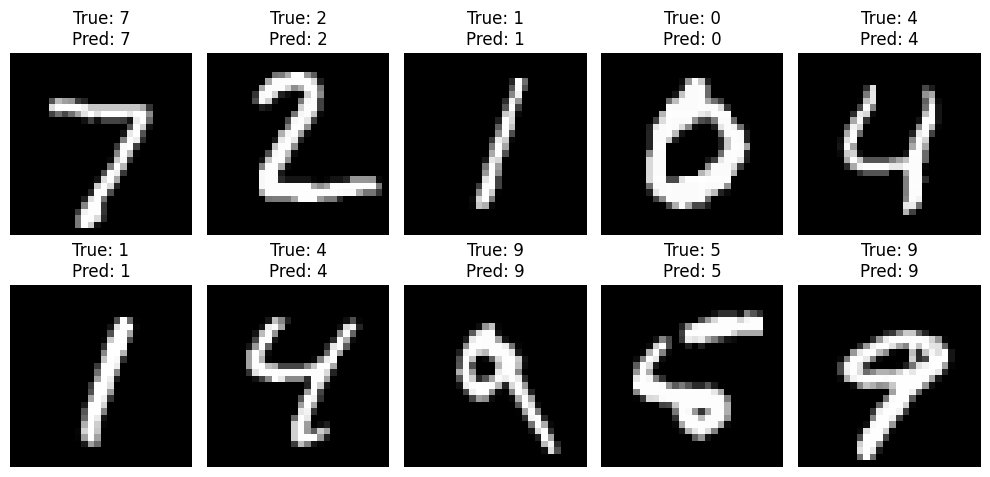

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Extract a few examples from the test set
num_examples = 10  # Number of examples to display
sample_images = x_test[:num_examples]
sample_labels = y_test[:num_examples]

# Predict labels using the trained model
predicted_probs = model.predict(sample_images)
predicted_labels = np.argmax(predicted_probs, axis=1)  # Convert probabilities to class indices

# Display the images along with their true and predicted labels
plt.figure(figsize=(10, 5))
for i in range(num_examples):
    plt.subplot(2, 5, i + 1)
    plt.imshow(sample_images[i].squeeze(), cmap='gray')  # Remove extra dimension for grayscale
    true_label = np.argmax(sample_labels[i])  # True label (one-hot encoded to index)
    pred_label = predicted_labels[i]  # Predicted label
    plt.title(f"True: {true_label}\nPred: {pred_label}")
    plt.axis('off')

plt.tight_layout()
plt.show()


filters learned

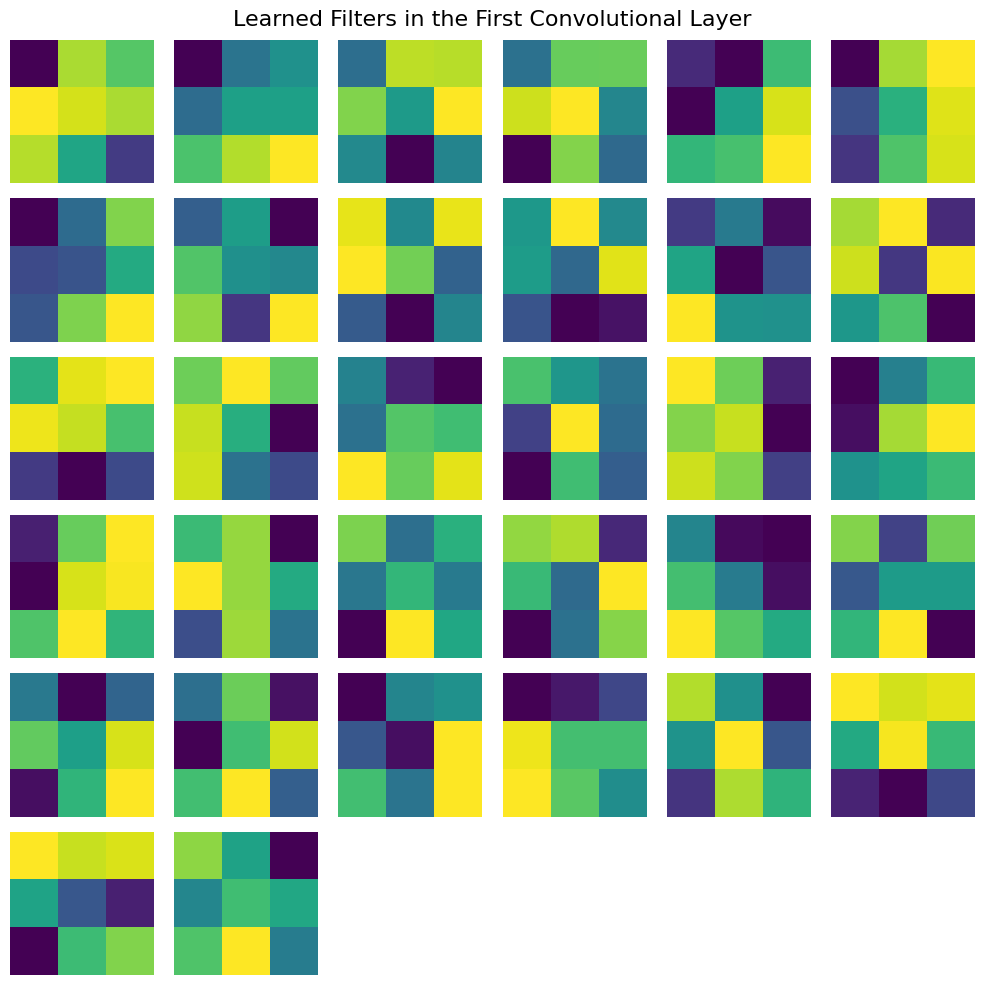

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Extract the filters from the first convolutional layer
first_conv_layer = model.layers[0]  # Assuming the first layer is a Conv2D layer
filters, biases = first_conv_layer.get_weights()  # Get weights and biases

# Normalize the filters for visualization
filters_min, filters_max = filters.min(), filters.max()
filters = (filters - filters_min) / (filters_max - filters_min)

# Number of filters
num_filters = filters.shape[-1]

# Visualize the filters
plt.figure(figsize=(10, 10))
for i in range(num_filters):
    plt.subplot(6, 6, i + 1)  # Adjust grid size based on the number of filters
    plt.imshow(filters[:, :, 0, i], cmap='viridis')  # Visualize each filter (assuming grayscale input)
    plt.axis('off')

plt.suptitle("Learned Filters in the First Convolutional Layer", fontsize=16)
plt.tight_layout()
plt.show()


This is a example Convolutional Neural Network using PyTorch


In [ ]:
# Import necessary libraries
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Define transformations for the dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # Normalize to range [-1, 1]
])

# Load MNIST dataset
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)

train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

# Define the CNN model
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3)  # First Conv Layer
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3)  # Second Conv Layer
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)  # MaxPooling Layer

        # Dynamically calculate the size of the flattened feature map
        self.flatten_size = self._get_flatten_size()

        self.fc1 = nn.Linear(self.flatten_size, 128)  # Fully connected layer 1
        self.fc2 = nn.Linear(128, 10)  # Fully connected layer 2 (output)

    def _get_flatten_size(self):
        # Create a dummy input to calculate the output size dynamically
        dummy_input = torch.zeros(1, 1, 28, 28)  # MNIST: 1 channel, 28x28 image
        x = self.pool(torch.relu(self.conv2(torch.relu(self.conv1(dummy_input)))))
        return x.numel()

    def forward(self, x):
        x = torch.relu(self.conv1(x))  # Apply first convolution + ReLU
        x = self.pool(torch.relu(self.conv2(x)))  # Apply second convolution + ReLU + Pooling
        x = x.view(x.size(0), -1)  # Flatten dynamically
        x = torch.relu(self.fc1(x))  # Fully connected layer 1 + ReLU
        x = self.fc2(x)  # Output layer
        return x


# Instantiate the model, loss function, and optimizer
model = CNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
epochs = 5
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        # Zero the gradient buffers
        optimizer.zero_grad()

        # Forward pass
        outputs = model(images)

        # Compute loss
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(train_loader):.4f}")

# Evaluate the model on the test set
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Test Accuracy: {100 * correct / total:.2f}%")


Using device: cpu
Epoch 1/5, Loss: 0.1314
Epoch 2/5, Loss: 0.0407
Epoch 3/5, Loss: 0.0245
Epoch 4/5, Loss: 0.0172
Epoch 5/5, Loss: 0.0116
Test Accuracy: 98.50%


Presenting results

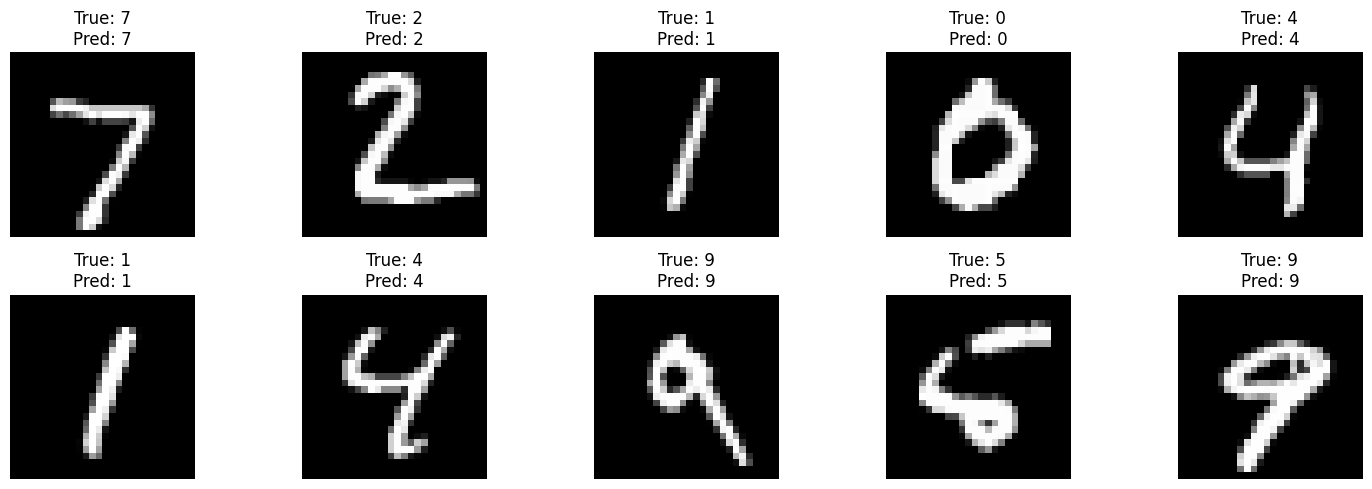

In [ ]:
import matplotlib.pyplot as plt
import torch
from torchvision.utils import make_grid

# Switch the model to evaluation mode
model.eval()

# Extract a few examples from the test set
num_examples = 10  # Number of examples to display
test_iter = iter(test_loader)  # Create an iterator for the test DataLoader
images, labels = next(test_iter)  # Get a batch of images and labels
images, labels = images[:num_examples], labels[:num_examples]  # Select first `num_examples`

# Perform predictions
with torch.no_grad():
    outputs = model(images.to(device))  # Forward pass
    predicted_labels = torch.argmax(outputs, axis=1)  # Predicted class indices

# Display the images along with their true and predicted labels
plt.figure(figsize=(15, 5))
for i in range(num_examples):
    plt.subplot(2, 5, i + 1)
    plt.imshow(images[i].squeeze().cpu().numpy(), cmap='gray')  # Convert to numpy and remove batch dim
    true_label = labels[i].item()  # Extract the true label
    pred_label = predicted_labels[i].item()  # Extract the predicted label
    plt.title(f"True: {true_label}\nPred: {pred_label}")
    plt.axis('off')

plt.tight_layout()
plt.show()
